interactive(children=(FloatSlider(value=0.05, description='x0', max=0.05, min=-0.05, step=0.01), FloatSlider(v…

<IPython.core.display.Javascript object>


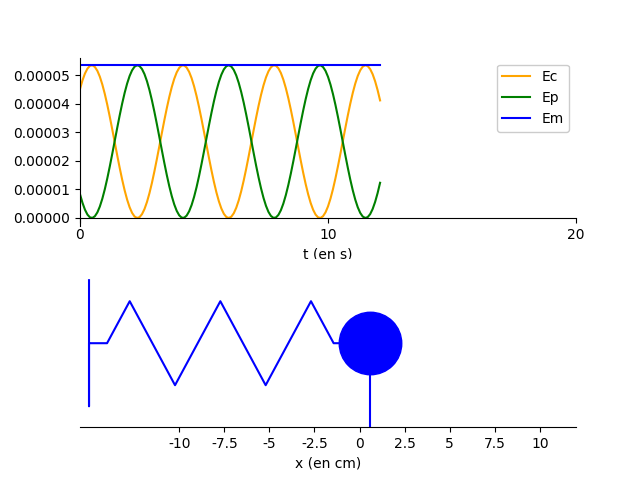

In [1]:
%matplotlib notebook
#En dynamique
from math import cos,pi,sin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, widgets

@interact(x0=(-0.05,0.05,0.01),v0=(-0.05,0.05,0.01),k=(0.5,1.5,0.01),m=(0.5,1.5,0.01))
def setx0(x0=0.05,v0=0.,k=1.,m=0.5):
    global t,t2,x,v,A,B,omega,xm,Ep,Em,Ec,ki,mi
    
    t=[0]
    t2=[0]
    x=[x0]
    v=[v0]
    Ep = [0.5*k*x0**2]
    Ec = [0.5*m*v0**2]
    Em = [Ep[0]+Ec[0]]
    ki = k
    mi = m
    omega = (k/m)**0.5
    xm = (x0**2 + v0**2/omega**2)**0.5
    A = x0
    B = v0/omega


fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
fig.show()

dt = 100

def f(t):
    global A,B,omega
    return A*cos(omega*t)+B*sin(omega*t)

def f2(t):
    global A,B,omega
    return -A*omega*sin(omega*t)+B*omega*cos(omega*t)

def anime(i):
    global t,x,v,t2,ki,mi,Ec,Ep,Em
    t.append(t[-1]+dt/1000)
    t2.append(t2[-1]+dt/1000)
    x.append(f(t[-1]))
    v.append(f2(t[-1]))
    Ep.append(0.5*ki*x[-1]**2)
    Ec.append(0.5*mi*v[-1]**2)
    Em.append(Ep[-1]+Ec[-1])
    ax1.clear()
    ax2.clear()
    
    ax1.set_xlabel("t (en s)")
    ax1.set_xlim([0,20])
    ax1.set_ylim([-0.05*Em[0],1.05*Em[0]])
    ax1.set_xticks([0,10,20])
    
    ax1.spines['right'].set_color('none')
    ax1.spines['top'].set_color('none')
    ax1.spines['bottom'].set_position(('data',0))
    ax1.spines['left'].set_position(('data',0))
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')

    ax1.plot(t2,Ec,"orange",label="Ec")
    ax1.plot(t2,Ep,"green",label="Ep")
    ax1.plot(t2,Em,"blue",label="Em")
    ax1.legend(loc='upper right',framealpha=1.)
    
  
    ax2.set_xlim([-0.155,0.12])
    ax2.set_ylim([-0.02,0.02])
    ax2.set_xticks([-0.1,-0.075,-0.05,-0.025,0,0.025,.05,.075,.1])
    ax2.set_xticklabels(["-10","-7.5","-5","-2.5","0","2.5","5","7.5","10"])
    ax2.set_yticks([])
    ax2.set_xlabel("x (en cm)")
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.spines['left'].set_color('none')
    ax2.xaxis.set_ticks_position('bottom')
  

    ax2.plot([x[-1]],[0],"o",color="blue",markersize=45)
    ax2.plot([x[-1],x[-1]],[0,-0.03],"blue")
    dx=0.12+x[-1]
    dx = dx/10
    ax2.plot([-0.15,-0.15,-0.15,-0.14,-0.14+dx]+[-0.14+dx+i*2*dx for i in range(1,5)]+[-0.14+10*dx,x[-1]],[0.015,-0.015,0,0,0.01]+[(-1)**i*0.01 for i in range(1,5)]+[0,0],"blue")
    
    if t2[-1]>=20:
        t=[t[-1]]
        t2=[0]
        x=[x[-1]]
        v=[v[-1]]
        Ep = [Ep[-1]]
        Ec = [Ec[-1]]
        Em = [Ep[0]+Ec[0]]
    
    
    
simulation=animation.FuncAnimation(fig,anime,interval=dt)